In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, completeness_score
%matplotlib inline

# Задание 1

In [2]:
from sklearn.datasets import make_classification

data1, data_y1 = make_classification(n_samples=300, n_classes=2, n_features=2,
                                     n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=42)

data2, data_y2 = make_classification(n_samples=1000, n_classes=5, n_features=6, n_clusters_per_class=5,
                                     n_redundant=0, n_informative=5, random_state=42)

data3, data_y3 = make_classification(n_samples=1200, n_classes=3, n_features=4, n_clusters_per_class=3,
                                     n_redundant=0, flip_y=0, n_informative=4, random_state=42)

# Визуализация кластеров

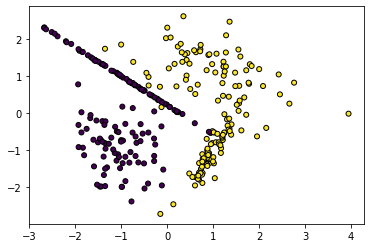

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data_y1, s=25, edgecolor="k")
plt.show()

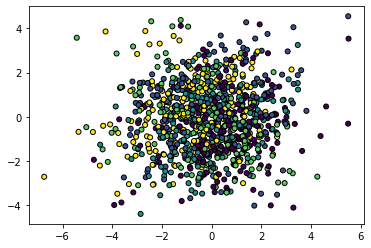

In [4]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data_y2, s=25, edgecolor="k")
plt.show()

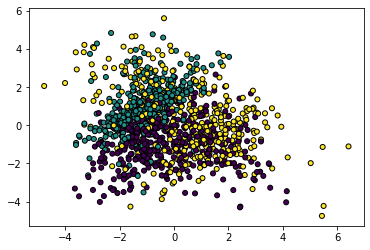

In [5]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data_y3, s=25, edgecolor="k")
plt.show()

# Алгоритмы кластеризации

## K-means

In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

params = {"n_clusters" : range(2, 10)}

kmeans1 = GridSearchCV(KMeans(random_state=42), params).fit(data1)
kmeans2 = GridSearchCV(KMeans(random_state=42), params).fit(data2)
kmeans3 = GridSearchCV(KMeans(random_state=42), params).fit(data3)

In [7]:
best_kmeans1 = kmeans1.best_estimator_
y_pred_km1 = best_kmeans1.fit_predict(data1)
best_kmeans2 = kmeans2.best_estimator_
y_pred_km2 = best_kmeans2.fit_predict(data2)
best_kmeans3 = kmeans3.best_estimator_
y_pred_km3 = best_kmeans3.fit_predict(data3)

## Оценка качества кластеризации

In [18]:
from sklearn.metrics.cluster import rand_score
km = [best_kmeans1, best_kmeans2, best_kmeans3]
arr_data_y = [data_y1, data_y2, data_y3]
arr_data = [data1, data2, data3]
arr_y_pred = [y_pred_km1, y_pred_km2, y_pred_km3]
best_kmeans1 = kmeans1.best_estimator_
y_pred_km1 = best_kmeans1.fit_predict(data1)
for i in range(len(km)):
    print(f"Silhouette Score data{i + 1}:", silhouette_score(arr_data[i], arr_y_pred[i]))
    print(f"Calinski-Harabasz Score data{i + 1}:", calinski_harabasz_score(arr_data[i], arr_y_pred[i]))
    print(f"Davies-Bouldin Score data{i + 1}:", davies_bouldin_score(arr_data[i], arr_y_pred[i]))
    print(f"Adjusted Rand Index data{i + 1}:", adjusted_rand_score(arr_data_y[i], arr_y_pred[i]))
    print(f"Completeness Score data{i + 1}:", completeness_score(arr_data_y[i], arr_y_pred[i]))
    print()

Silhouette Score data1: 0.43305696326068616
Calinski-Harabasz Score data1: 371.35562491342625
Davies-Bouldin Score data1: 0.745734584064587
Adjusted Rand Index data1: 0.18891339420953396
Completeness Score data1: 0.24986683854719205

Silhouette Score data2: 0.1376988386826958
Calinski-Harabasz Score data2: 114.02841179875998
Davies-Bouldin Score data2: 1.6102698181223345
Adjusted Rand Index data2: 0.03508766313024438
Completeness Score data2: 0.06192558318218287

Silhouette Score data3: 0.22571146998985264
Calinski-Harabasz Score data3: 274.5266083219697
Davies-Bouldin Score data3: 1.2490064945060662
Adjusted Rand Index data3: 0.12477281902440888
Completeness Score data3: 0.15822003782697813



## AffinityPropagation

In [25]:
from sklearn.cluster import AffinityPropagation

params = {"max_iter" : range(100, 1001, 100)}

clustering1 = GridSearchCV(AffinityPropagation(), params, scoring='adjusted_rand_score').fit(data1)
clustering2 = GridSearchCV(AffinityPropagation(), params, scoring='adjusted_rand_score').fit(data2)
clustering3 = GridSearchCV(AffinityPropagation(), params, scoring='adjusted_rand_score').fit(data3)

best_clustering1 = clustering1.best_estimator_
y_pred_clus1 = best_clustering1.fit_predict(data1)
best_clustering2 = clustering2.best_estimator_
y_pred_clus2 = best_clustering2.fit_predict(data2)
best_clustering3 = clustering3.best_estimator_
y_pred_clus3 = best_clustering3.fit_predict(data3)

C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator,

## Оценка качества кластеризации

In [19]:
arr_y_pred = [y_pred_clus1, y_pred_clus2, y_pred_clus3]
for i in range(len(arr_y_pred)):
    print(f"Silhouette Score data{i + 1}:", silhouette_score(arr_data[i], arr_y_pred[i]))
    print(f"Calinski-Harabasz Score data{i + 1}:", calinski_harabasz_score(arr_data[i], arr_y_pred[i]))
    print(f"Davies-Bouldin Score data{i + 1}:", davies_bouldin_score(arr_data[i], arr_y_pred[i]))
    print(f"Adjusted Rand Index data{i + 1}:", adjusted_rand_score(arr_data_y[i], arr_y_pred[i]))
    print(f"Completeness Score data{i + 1}:", completeness_score(arr_data_y[i], arr_y_pred[i]))
    print()

Silhouette Score data1: 0.4294186778811229
Calinski-Harabasz Score data1: 385.8522025925063
Davies-Bouldin Score data1: 0.7699939119329465
Adjusted Rand Index data1: 0.12672893215407
Completeness Score data1: 0.20830704561474062

Silhouette Score data2: 0.1386361257870926
Calinski-Harabasz Score data2: 46.114921590986455
Davies-Bouldin Score data2: 1.3896570996805506
Adjusted Rand Index data2: 0.022469112519014397
Completeness Score data2: 0.1309695971504704

Silhouette Score data3: 0.21412996521987698
Calinski-Harabasz Score data3: 147.59092082944355
Davies-Bouldin Score data3: 1.1210851249639504
Adjusted Rand Index data3: 0.038082623483202696
Completeness Score data3: 0.1615142331340723



## DBSCAN

In [21]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN()

y_pred_db1 = dbscan.fit_predict(data1)

y_pred_db2 = dbscan.fit_predict(data2)

y_pred_db3 = dbscan.fit_predict(data3)

## Оценка качества кластеризации

In [23]:
arr_y_pred = [y_pred_db1, y_pred_db2, y_pred_db3]
for i in range(len(arr_y_pred)):
    print(f"Silhouette Score data{i + 1}:", silhouette_score(arr_data[i], arr_y_pred[i]))
    print(f"Calinski-Harabasz Score data{i + 1}:", calinski_harabasz_score(arr_data[i], arr_y_pred[i]))
    print(f"Davies-Bouldin Score data{i + 1}:", davies_bouldin_score(arr_data[i], arr_y_pred[i]))
    print(f"Adjusted Rand Index data{i + 1}:", adjusted_rand_score(arr_data_y[i], arr_y_pred[i]))
    print(f"Completeness Score data{i + 1}:", completeness_score(arr_data_y[i], arr_y_pred[i]))
    print()

Silhouette Score data1: 0.28011783381178523
Calinski-Harabasz Score data1: 5.382541764048294
Davies-Bouldin Score data1: 2.922737225805938
Adjusted Rand Index data1: 0.00178917664119261
Completeness Score data1: 0.07874387968132775



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## GaussianMixture

In [30]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=2).fit(data1)
gm2 = GaussianMixture(n_components=5).fit(data2)
gm3 = GaussianMixture(n_components=3).fit(data3)

In [31]:
y_pred_gm1 = gm1.fit_predict(data1)

y_pred_gm2 = gm2.fit_predict(data2)

y_pred_gm3 = gm3.fit_predict(data3)

## Оценка качества кластеризации

In [32]:
arr_y_pred = [y_pred_gm1, y_pred_gm2, y_pred_gm3]
for i in range(len(arr_y_pred)):
    print(f"Silhouette Score data{i + 1}:", silhouette_score(arr_data[i], arr_y_pred[i]))
    print(f"Calinski-Harabasz Score data{i + 1}:", calinski_harabasz_score(arr_data[i], arr_y_pred[i]))
    print(f"Davies-Bouldin Score data{i + 1}:", davies_bouldin_score(arr_data[i], arr_y_pred[i]))
    print(f"Adjusted Rand Index data{i + 1}:", adjusted_rand_score(arr_data_y[i], arr_y_pred[i]))
    print(f"Completeness Score data{i + 1}:", completeness_score(arr_data_y[i], arr_y_pred[i]))
    print()

Silhouette Score data1: 0.36939049138297947
Calinski-Harabasz Score data1: 180.62446513562884
Davies-Bouldin Score data1: 1.1750354975014465
Adjusted Rand Index data1: 0.715894639365883
Completeness Score data1: 0.6105856575260087

Silhouette Score data2: 0.06851323681008631
Calinski-Harabasz Score data2: 78.1929624317125
Davies-Bouldin Score data2: 2.6221874656384783
Adjusted Rand Index data2: 0.04702318287638753
Completeness Score data2: 0.0653827129803853

Silhouette Score data3: 0.1851268926275635
Calinski-Harabasz Score data3: 272.5660168189011
Davies-Bouldin Score data3: 1.598568618998118
Adjusted Rand Index data3: 0.17888075999209957
Completeness Score data3: 0.19038727280657744



## Реализация KMeans ручками

In [17]:
def kmeans(X, k, iter=100):
    
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(iter):
        distance = np.sqrt(((X[:, np.newaxis] - centers) ** 2).sum(axis=2))
        
        label = np.argmin(distance, axis=1)
        
        new_centers = np.array([X[label == j].mean(axis=0) for j in range(k)])
        
        if np.all(new_centers == centers):
            break
            
    return centers, label

In [18]:
centers, label = kmeans(data1, 2)

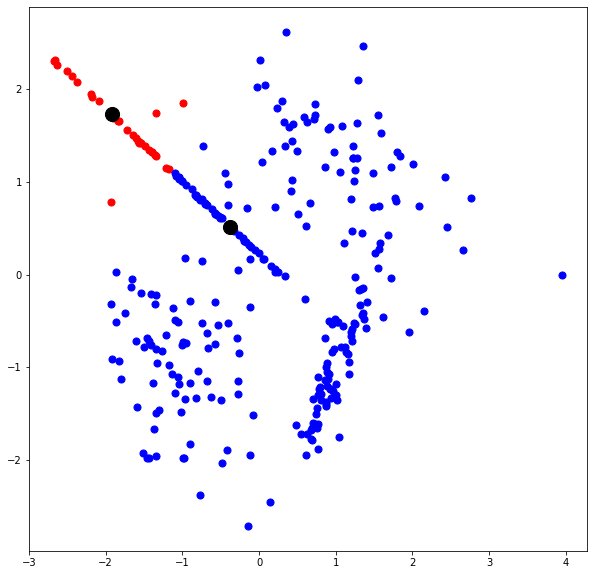

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(data1[label == 0][:,0], data1[label == 0][:,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(data1[label == 1][:,0], data1[label == 1][:,1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(centers[:, 0], centers[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.show()

# Задание 2

In [3]:
df_clf = pd.read_csv('./data/df_clf.csv')
df_clf.head()

,Unnamed: 0,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,XE,...,DL,9E,MQ,YV,US,EV,B6,OH,HA,F9
0,0,400740,3036,135.0,54.0,4.0,1195,131.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,194808,315,79.0,207.0,7.0,707,145.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,526903,6673,253.0,194.0,5.0,499,42.0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,477937,3668,217.0,207.0,2.0,810,70.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,48180,623,153.0,214.0,5.0,985,143.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_clf = df_clf.drop(['Delay', 'Unnamed: 0', 'id'], axis=1)
y_clf = df_clf['Delay']

In [6]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.9, random_state=42)

## KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
kmeans = KMeans(random_state=42)

params = {'n_clusters': range(2, 11), 'init': ['k-means++', 'random'], 'n_init': range(5, 20, 5)}

km = RandomizedSearchCV(kmeans, params).fit(X_train_clf)

best_km = km.best_estimator_
y_pred_km = best_km.fit_predict(X_train_clf)

## AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering()
params = {'n_clusters': range(2, 6)}
agglom = RandomizedSearchCV(agglom, params, scoring='adjusted_rand_score').fit(X_train_clf)
best_agglom = agglom.best_estimator_
y_pred_agglom = best_agglom.fit_predict(X_train_clf)

C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test p

## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5)

y_pred_db = dbscan.fit_predict(X_train_clf)

## Визуализация построенных моделей

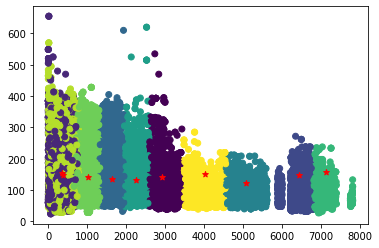

In [14]:
plt.scatter(X_train_clf.iloc[:, 0], X_train_clf.iloc[:, 5], c=y_pred_km)
plt.scatter(best_km.cluster_centers_[:, 0], best_km.cluster_centers_[:, 1], marker='*', c='r')
plt.show()

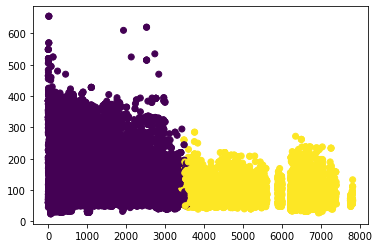

In [16]:
plt.scatter(X_train_clf.iloc[:, 0], X_train_clf.iloc[:, 5], c=y_pred_agglom)
plt.show()

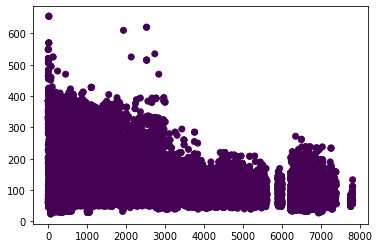

In [21]:
plt.scatter(X_train_clf.iloc[:, 0], X_train_clf.iloc[:, 5], c=y_pred_db)
plt.show()

## Оценка качества моделей

In [28]:
arr_y_pred = [y_pred_km, y_pred_agglom]
for i in range(len(arr_y_pred)):
    print(f"Silhouette Score:", silhouette_score(X_train_clf, arr_y_pred[i]))
    print(f"Calinski-Harabasz Score:", calinski_harabasz_score(X_train_clf, arr_y_pred[i]))
    print(f"Davies-Bouldin Score data:", davies_bouldin_score(X_train_clf, arr_y_pred[i]))
    print(f"Adjusted Rand Index:", adjusted_rand_score(y_train_clf, arr_y_pred[i]))
    print(f"Completeness Score:", completeness_score(y_train_clf, arr_y_pred[i]))
    print()

Silhouette Score: 0.32797976419697267
Calinski-Harabasz Score: 148232.90863489854
Davies-Bouldin Score data: 1.0044259476874933
Adjusted Rand Index: -0.00026359412293234537
Completeness Score: 0.0017461412905403076

Silhouette Score: 0.6502970451134701
Calinski-Harabasz Score: 112784.93115846567
Davies-Bouldin Score data: 0.5022033652228965
Adjusted Rand Index: -0.016286565703821594
Completeness Score: 0.002154237626254017



In [13]:
class DB():
    def __init__(self, eps = 3, min_count_neighbour = 3):
        self.eps = eps
        self.min_count_neighbour = 3
    
    def fit(self, X):
        self.count_cluster = 0
        self.verified_points = np.full(len(X), -1)
        
        for i_point in range(len(self.verified_points)):
            if self.verified_points[i_point] != -1:
                continue
            
            neighbours = self.around_neighbours(X, i_point)
            
            if len(neighbours) < self.min_count_neighbour:
                self.verified_points[i_point] = 0
            else:
                self.count_cluster += 1
                self.search_for_neighbors(X, i_point, neighbours)
                
        return self.verified_points
            
    def around_neighbours(self, X, i_point):
        neighbours = []
        
        for i in range(len(X)):
            if self.distance(X[i_point], X[i]) <= self.eps:
                neighbours.append(i)
        return neighbours
    
    def distance(self, x1, x2):
        distances = np.linalg.norm(x1 - x2)
        return distances
    
    def search_for_neighbors(self, X, i_point, neighbours):
        self.verified_points[i_point] = self.count_cluster

        i = 0
        while i < len(neighbours):
            n_i = neighbours[i]
            if self.verified_points[n_i] == 0:
                self.verified_points[n_i] = self.count_cluster
            elif self.verified_points[n_i] == -1:
                self.verified_points[n_i] = self.count_cluster
                new_neighbours = self.around_neighbours(X, n_i)
                if len(new_neighbours) >= self.min_count_neighbour:
                    #print(new_neighbours)
                    #neighbours = list(list(set(neighbours)).union(new_neighbours))
                    neighbours = np.concatenate([neighbours, new_neighbours])
            i += 1

In [14]:
db1 = DB().fit(data1)
db2 = DB().fit(data2)
db3 = DB().fit(data3)

In [15]:
print("Completeness Score:", completeness_score(data_y1, db1))

Completeness Score: 1.0


In [16]:
print("Completeness Score:", completeness_score(data_y2, db2))

Completeness Score: 0.11948960177451576


In [17]:
print("Completeness Score:", completeness_score(data_y3, db3))

Completeness Score: 1.0
